In [157]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 align="center"> Naive Testing </h1>
<h3 align="center"> Christine Zhang </h3>

---

In [9]:
import numpy as np
import pandas as pd
import scipy as sp
import pickle
from scipy import stats 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

### Combined Mutation and Copy number 

---

In [10]:
file_name = "datamaster"
file_object = open(file_name,'r')  
compiled_pd = pickle.load(file_object)
print np.shape(compiled_pd)
compiled_pd.head()

(24705, 472)


,3,7,10,15,16,19,21,22,23,25,...,155481,155493,155498,155502,155505,155510,155511,155513,155518,155520
Entrez_id,,,,,,,,,,,,,,,,,,,,,
1.0,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,0.3225,0.0449,0.7539,0.2257,-0.4485,0.6030,0.1019,0.2509,0.2151,-0.4925
503538.0,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,0.3225,0.0449,0.7539,0.2257,-0.4485,0.6030,0.1019,0.2509,0.2151,-0.4925
29974.0,-0.4928,-0.0025,-0.0522,-0.3050,0.0436,0.1438,-0.3561,-0.1415,-0.3390,-0.1974,...,0.1998,0.2115,-0.4515,-0.6989,-0.2394,-0.6309,0.1249,0.2204,0.0812,0.3083
2.0,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,0.1151,0.2944,0.4668,-0.7178,0.0167,0.1509,0.3356,-0.5784,0.0759,0.1633
144571.0,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,0.1151,0.2944,0.4668,-0.7178,0.0167,0.1509,0.3356,-0.5784,0.0759,0.1633


In [11]:
no_auc_pd = compiled_pd.drop(compiled_pd.index[len(compiled_pd)-1])
no_auc_trans_pd = no_auc_pd.transpose()
no_auc_trans = no_auc_trans_pd.as_matrix()
print np.shape(no_auc_trans)
no_auc_trans_pd.tail(n=10)

(472, 24704)


Entrez_id,1.0,503538.0,29974.0,2.0,144571.0,144568.0,3.0,53947.0,51146.0,100506677.0,...,6608.0,8522.0,2885.0,2161.0,27255.0,23072.0,6725.0,9149.0,6241.0,8301.0
155481,0.3225,0.3225,0.1998,0.1151,0.1151,0.1151,0.1151,-0.1256,-0.1010,0.0426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155493,0.0449,0.0449,0.2115,0.2944,0.2944,0.2944,0.2944,-0.1442,0.2359,-0.0354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155498,0.7539,0.7539,-0.4515,0.4668,0.4668,0.4668,0.4668,0.1117,-0.4901,0.1379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155502,0.2257,0.2257,-0.6989,-0.7178,-0.7178,-0.7178,-0.7178,0.2850,0.7444,-0.7095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155505,-0.4485,-0.4485,-0.2394,0.0167,0.0167,0.0167,0.0167,-0.9046,0.0893,0.1214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155510,0.6030,0.6030,-0.6309,0.1509,0.1509,0.1509,0.1509,-0.8406,0.1808,0.1128,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
155511,0.1019,0.1019,0.1249,0.3356,0.3356,0.3356,0.3356,0.3811,0.3976,0.0576,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
155513,0.2509,0.2509,0.2204,-0.5784,-0.5784,-0.5784,-0.5784,-0.2527,0.8265,0.3834,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
155518,0.2151,0.2151,0.0812,0.0759,0.0759,0.0759,0.0759,-0.7911,0.0989,0.0992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155520,-0.4925,-0.4925,0.3083,0.1633,0.1633,0.1633,0.1633,-0.4020,0.3050,0.1095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
file_name = "master_no_auc"
with open(file_name,'wb') as my_file_obj:
    pickle.dump(no_auc_trans_pd,my_file_obj)

In [13]:
auc_pd = compiled_pd.iloc[-1:]
auc = auc_pd.as_matrix()
auc = auc.reshape([472,1])
print np.shape(auc)
auc_pd

(472, 1)


,3,7,10,15,16,19,21,22,23,25,...,155481,155493,155498,155502,155505,155510,155511,155513,155518,155520
Entrez_id,,,,,,,,,,,,,,,,,,,,,
0.0,2.473,2.142,3.38,3.374,3.123,3.779,3.471,2.625,4.677,2.751,...,2.469,3.071,5.351,3.929,3.912,4.913,3.755,1.712,4.61,5.46


In [14]:
file_name = "master_auc"
with open(file_name,'wb') as my_file_obj:
    pickle.dump(auc_pd,my_file_obj)

In [17]:
linreg = LinearRegression()
svr = SVR()
rf = RandomForestRegressor()

# test naive models
def test_model (model):
    clf = model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    r2 = clf.score(x_test, y_test)
    return y_pred, r2

def draw_plot (ax, y_pred, title, y_score):
    y_pred = y_pred.flatten()
    ax.scatter(y_pred, y_test)
    ax.plot(np.unique(y_pred), np.poly1d(np.polyfit(y_pred, y_test, 1))(np.unique(y_pred)))
    ax.set_title("%s r2 accuracy: %s" %(title, round(y_score, 3)))
    ax.set_xlabel("Predicted AUC")
    ax.set_ylabel("Actual AUC")
    return plt

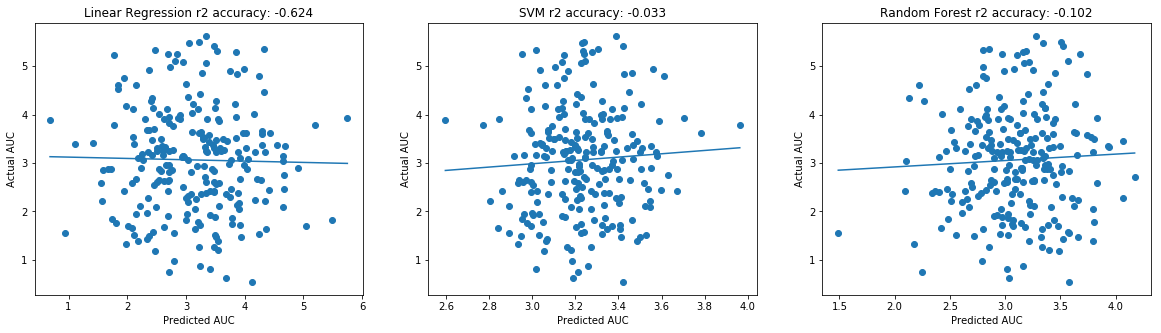

In [18]:
x_train, x_test, y_train, y_test = train_test_split(no_auc_trans, auc, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred, linreg_r2 = test_model (linreg)
svr_y_pred, svr_r2 = test_model (svr)
rf_y_pred, rf_r2 = test_model (rf)

fig_all, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], linreg_y_pred, "Linear Regression", linreg_r2)
ax[1] = draw_plot (ax[1], svr_y_pred, "SVM", svr_r2)
ax[2] = draw_plot (ax[2], rf_y_pred, "Random Forest", rf_r2)

### Just Mutation

---

In [19]:
file_name = "mutation_pd"
file_object = open(file_name,'r')  
mutation_pd = pickle.load(file_object)
print len(mutation_pd)

1530


In [20]:
just_mutation_pd = no_auc_trans_pd.iloc[:, len(no_auc_trans_pd.columns)-len(mutation_pd):]
just_mutation_pd.head()

Entrez_id,890.0,4478.0,2317.0,6790.0,120892.0,4342.0,4739.0,6498.0,8313.0,10298.0,...,6608.0,8522.0,2885.0,2161.0,27255.0,23072.0,6725.0,9149.0,6241.0,8301.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


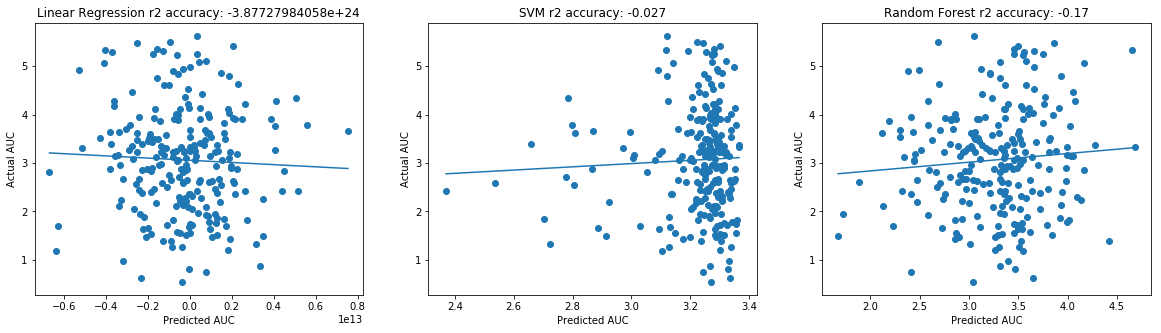

In [21]:
x_train, x_test, y_train, y_test = train_test_split(just_mutation_pd, auc, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_mut, linreg_r2_mut = test_model (linreg)
svr_y_pred_mut, svr_r2_mut = test_model (svr)
rf_y_pred_mut, rf_r2_mut = test_model (rf)

fig_mut, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], linreg_y_pred_mut, "Linear Regression", linreg_r2_mut)
ax[1] = draw_plot (ax[1], svr_y_pred_mut, "SVM", svr_r2_mut)
ax[2] = draw_plot (ax[2], rf_y_pred_mut, "Random Forest", rf_r2_mut)

### Just Copy Number

---

In [23]:
just_copy_num_pd = no_auc_trans_pd.iloc[:, :-len(mutation_pd)]
just_copy_num_pd.head()

Entrez_id,1.0,503538.0,29974.0,2.0,144571.0,144568.0,3.0,53947.0,51146.0,100506677.0,...,90834.0,91149.0,91316.0,91450.0,91948.0,92249.0,92973.0,93432.0,93622.0,96610.0
3,-0.0324,-0.0324,-0.4928,-0.0657,-0.0657,-0.0657,-0.0657,-0.0390,0.0518,0.4291,...,-0.0390,0.0865,0.3492,-0.0328,0.0134,0.0068,0.3753,0.3447,-0.5221,0.3231
7,-0.0762,-0.0762,-0.0025,0.4486,0.4486,0.4486,0.4486,-0.0574,-0.0303,-0.0712,...,-0.0574,-0.9972,0.0626,-0.0705,-0.0705,-0.0164,-0.0542,0.4749,-0.0770,0.0626
10,0.0346,0.0346,-0.0522,-0.3816,-0.3816,-0.3816,-0.3816,-0.0155,-0.2675,-0.7758,...,-0.0155,0.3231,-0.0227,0.0947,0.1348,0.3855,-0.2897,-0.4246,-0.0198,0.0390
15,0.2934,0.2934,-0.3050,0.1603,0.1603,0.1603,0.1603,-0.2881,0.2831,0.0613,...,-0.4840,-0.2420,-0.4661,-0.3308,-0.3570,-0.0185,-0.2710,-0.4542,-0.3288,-0.4152
16,0.0463,0.0463,0.0436,-0.0112,-0.0112,-0.0112,-0.0112,0.0834,0.0468,0.0528,...,0.0834,0.0290,0.1263,0.0286,0.0330,0.0037,0.0684,0.0400,0.0982,0.1263


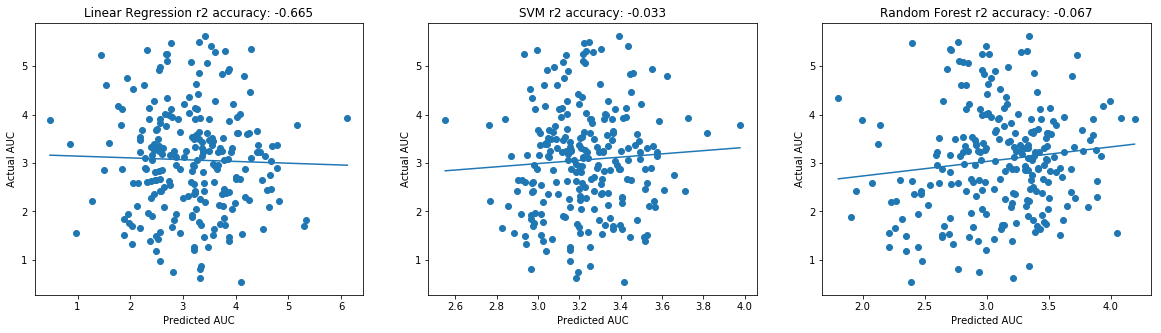

In [24]:
x_train, x_test, y_train, y_test = train_test_split(just_copy_num_pd, auc, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_cn, linreg_r2_cn = test_model (linreg)
svr_y_pred_cn, svr_r2_cn = test_model (svr)
rf_y_pred_cn, rf_r2_cn = test_model (rf)

fig_cn, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], linreg_y_pred_cn, "Linear Regression", linreg_r2_cn)
ax[1] = draw_plot (ax[1], svr_y_pred_cn, "SVM", svr_r2_cn)
ax[2] = draw_plot (ax[2], rf_y_pred_cn, "Random Forest", rf_r2_cn)

In [25]:
score_df = pd.DataFrame({'Linear Regression': [linreg_r2, linreg_r2_mut, linreg_r2_cn],
                         'Support Vector Machine': [svr_r2,svr_r2_mut, svr_r2_cn],
                         'Random Forest': [rf_r2, rf_r2_mut, rf_r2_cn]}, 
                       index=["All", "Mutation", "Copy Number"])
score_df

,Linear Regression,Random Forest,Support Vector Machine
All,-6.241467e-01,-0.102053,-0.032925
Mutation,-3.877280e+24,-0.169781,-0.026937
Copy Number,-6.648550e-01,-0.067127,-0.033177
